In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


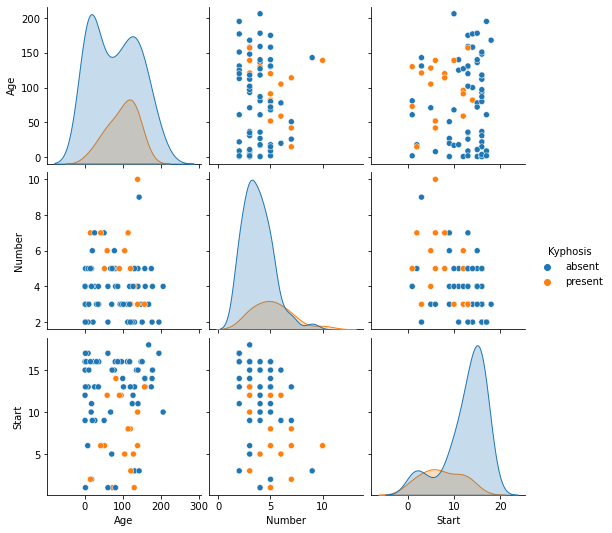

In [9]:
sns.pairplot(df,hue='Kyphosis')

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Kyphosis',axis=1)

In [15]:
y = df['Kyphosis']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[14  5]
 [ 3  3]]


              precision    recall  f1-score   support

      absent       0.82      0.74      0.78        19
     present       0.38      0.50      0.43         6

    accuracy                           0.68        25
   macro avg       0.60      0.62      0.60        25
weighted avg       0.72      0.68      0.69        25



In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators = 200)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [27]:
rfc_pred = rfc.predict(X_test)

In [28]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[16  3]
 [ 4  2]]


              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [29]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64